# Read Data

In [1]:
from pandas import *

In [3]:
#read in the test set 
df = read_csv("testdata.csv",header=None)

In [4]:
#read in only the sentiment and tweet
df = df.loc[:, (0,5)]

In [5]:
#rename the columns
df.columns = ['Sentiment', 'the actual tweet']

In [6]:
#convert the feature values
df['Sentiment'] = df['Sentiment'].map({0: -1, 2: 1, 4: 1})

In [7]:
df

,Sentiment,the actual tweet
0,1,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,1,Reading my kindle2... Love it... Lee childs i...
2,1,"Ok, first assesment of the #kindle2 ...it fuck..."
3,1,@kenburbary You'll love your Kindle2. I've had...
4,1,@mikefish Fair enough. But i have the Kindle2...
5,1,@richardebaker no. it is too big. I'm quite ha...
6,-1,Fuck this economy. I hate aig and their non lo...
7,1,Jquery is my new best friend.
8,1,Loves twitter
9,1,how can you not love Obama? he makes jokes abo...


In [8]:
np.save("test_file.npy", df)

In [9]:
import numpy as np
import pandas as pd

In [10]:
df = np.load("test_file.npy")

In [11]:
df=pd.DataFrame(df)

# Data Cleaning

In [12]:
#step 1: Convert all letters into lowercase

df[2]=df[1].str.lower()

In [13]:
#We ignore words after the first comma for simlification

def split(s):
    new_s = s.split(',')[0]
    return new_s

df[2] = df[2].apply(split)

In [14]:
#step 2: convert all websites to URL

df[2] = df[2].str.replace(r'(http\:|https\:|www\.)\S+','URL')

In [15]:
#step 3: remove all punctuations except @ 
#If we remove all the punctuations, it will cause a problem to step 4.

import string
df[2] = df[2].str.translate(None, string.punctuation.replace(r'@',""))

In [16]:
#step 4: convert @username to AT-USER

df[2] = df[2].str.replace(r'@\S+','AT-USER')

In [17]:
#step 5: remove additional white space
#We use the split() function to get rid of additional white space to 

df[2] = df[2].str.split()

In [18]:
#create a set of stopwords

stopwords = set()
stop_file = open('stopwords.txt')
for line in stop_file:
    stopwords.add(line.strip())
    
#add more stop words to the file
stopwords.add('AT-USER') 
stopwords.add('cant')
stopwords.add('couldnt')
stopwords.add('didnt')
stopwords.add('dont')
stopwords.add('doesnt')
stopwords.add('wouldnt')

In [19]:
#ignore stop words 

def remove_stopwords(s):
    return [x for x in s if x not in stopwords]

df[2] = df[2].apply(remove_stopwords)

In [20]:
#step 6: replace duplicate words
#Add a new column for non-duplicate words in order to create the bag of words
#We will use column 2 to calculate the feature vectors in 1.3

def remove_duplicate(s):
    return list(set(x for x in s if x))

df[3] = df[2].apply(remove_duplicate)

In [21]:
#rename the columns
df.columns = ['sentiment', 'orignial tweet', 'split tweets with dupicates', 'split tweets without dupicates']

In [25]:
np.save("test_file.npy", df)

In [26]:
df

,sentiment,orignial tweet,split tweets with dupicates,split tweets without dupicates
0,1,@stellargirl I loooooooovvvvvveee my Kindle2. ...,"[loooooooovvvvvveee, kindle2, dx, cool]","[kindle2, loooooooovvvvvveee, dx, cool]"
1,1,Reading my kindle2... Love it... Lee childs i...,"[reading, kindle2, love, lee, childs, read]","[childs, love, lee, kindle2, read, reading]"
2,1,"Ok, first assesment of the #kindle2 ...it fuck...",[ok],[ok]
3,1,@kenburbary You'll love your Kindle2. I've had...,"[youll, love, kindle2, ive, mine, months, look...","[ive, love, huge, kindle2, months, mine, looke..."
4,1,@mikefish Fair enough. But i have the Kindle2...,"[fair, kindle2, perfect]","[kindle2, perfect, fair]"
5,1,@richardebaker no. it is too big. I'm quite ha...,"[im, happy, kindle2]","[kindle2, im, happy]"
6,-1,Fuck this economy. I hate aig and their non lo...,"[fuck, economy, hate, aig, loan, asses]","[loan, fuck, asses, aig, hate, economy]"
7,1,Jquery is my new best friend.,"[jquery, friend]","[jquery, friend]"
8,1,Loves twitter,"[loves, twitter]","[twitter, loves]"
9,1,how can you not love Obama? he makes jokes abo...,"[love, obama, makes, jokes]","[makes, jokes, love, obama]"


In [28]:
# Create the bag of words

bag = {}
i = 0
for tweet in df['split tweets without dupicates']:
    if tweet:
        for word in tweet:
            if word not in bag:
                bag[word] = i 
                i += 1

In [29]:
bag

{'todays': 1473,
 'msgs': 496,
 'whoopi': 49,
 'sleep': 180,
 '6pm': 334,
 'hate': 25,
 'bike': 179,
 'worth': 431,
 '@': 206,
 'updated': 1552,
 'regional': 694,
 'yeeeee': 1370,
 'vastly': 253,
 'ala': 1259,
 'bringing': 1227,
 'monkeys': 1153,
 'tagging': 765,
 'tickets': 982,
 'barraged': 1168,
 'school': 167,
 'wednesday': 1350,
 'handout': 351,
 '299': 897,
 'heading': 1048,
 'enjoy': 541,
 'tired': 1038,
 'phones': 1475,
 'saved': 1392,
 'bonuses': 192,
 'net': 831,
 'told': 72,
 'hero': 76,
 'screams': 1077,
 'richest': 807,
 'rampr': 93,
 'china': 344,
 '100': 1201,
 'kids': 532,
 'study': 493,
 'changed': 258,
 'ajax': 772,
 'itunes': 760,
 'mentor': 870,
 'chrysler': 147,
 'military': 149,
 'colorway': 1414,
 'campaign': 446,
 'highly': 223,
 'googleio': 469,
 'tremens': 1438,
 'dnc': 401,
 'furkin': 1235,
 'asses': 23,
 'call': 880,
 'comcast': 1070,
 'recommend': 222,
 'survive': 200,
 'tell': 561,
 'successful': 875,
 'naive': 859,
 'haha': 954,
 'yahoo': 247,
 'award': 1

In [30]:
np.save("test_bag.npy", bag)

# Extract Unigram Features

In [33]:
#extract unigram features from the bag of words

import re
from sklearn.feature_extraction.text import CountVectorizer

def join_string(x):
    return ','.join(x)   
str_training = df['split tweets with dupicates'].apply(join_string)

def tokenize(text):
    return [tok for tok in REGEX.split(text) if tok]

REGEX = re.compile(r",\s*")
vec = CountVectorizer(stop_words = None, tokenizer = tokenize, decode_error = 'ignore',dtype='int8')

#Create feature vectors
features_test = vec.fit_transform(str_training).toarray()

In [34]:
features_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [35]:
#check the dimension of the feature vector
len(features_test[0])

1588

In [36]:
#test the features of second tweet
sum(features_test[1])

6

In [37]:
#test the features of first tweet 488
sum(features_test[488])

3

In [39]:
#create sentiment vectors
sentiment_test = np.array(df['sentiment'])

In [40]:
sentiment_test

array([1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1, -1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1,
       -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1,
       1, 1, -1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, 1,
       1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1,
       -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1,
       1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 1, -1, 1, 1, 1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1,
       1, 1, 1, 1, 1, 

# Pegasos

In [41]:
s = sentiment_test
features = features_test

In [43]:
#regularization factor: lamda=0.001
#Number of iterations: T=1000
#Initialize w as zero vector
#Take a mini-batch with size B=100 from training set

lamda, B = 0.001, 100
w = np.zeros((1, len(features[0])), dtype = np.int32) 
T = 10000
errors = np.zeros((T, ))

for t in range(1, T): 
    #compute the learning rate
    eta = 1 / (t * lamda) 
    
    #Take a mini-batch with size B
    sample = np.random.randint(low = 0, high = len(features) - 1, size = B) 
    i = (s[sample].reshape(B, 1) * (features[sample].dot(w.T))) < 1
    su = sum(i * s[sample].reshape(B, 1) * features[sample])
    #stochastic gradient
    delta = lamda * w - eta / B * su
    w_prime = w - eta * delta
    
    #compute the projection
    try:
        w = min(1, 1 / (lamda**0.5 * np.linalg.norm(w_prime, 2))) * w_prime
    except:
        w = w_prime
    #calculate the training errors    
    predict = 2 * (features[sample].dot(w.T) >= 0) - 1
    errors[t - 1] = np.mean(s[sample].reshape(B, 1) != predict)

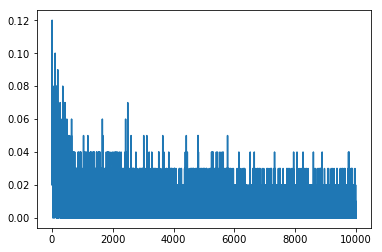

In [44]:
import matplotlib.pyplot as plt
plt.plot(errors)
plt.show()

In [45]:
np.save("errors_test_pegasos.npy", errors)

# AdaGrad

In [46]:
features = features_test

In [47]:
#Initial earning rate: eta=0.001
#Number of iterations: T=10000
#Initialize w as zero vector
#Initialize st as identity vector
#Take a mini-batch of size B=100 from training set

ETA, p, B, LAMBDA = 0.001, len(features_test[0]), 100, 0.001
w, st = np.zeros((1, p)), np.ones(p, )
T = 10000
test_errors_ada = np.zeros(T/1000, )

In [48]:
for t in range(1, T):
    selected_index = np.random.randint(low = 0, high = len(features_test) - 1, size = B)
    i = (sentiment_test[selected_index].reshape(B, 1) * (features_test[selected_index].dot(w.T))) < 1
    delta = np.sum(i * sentiment_test[selected_index].reshape(B, 1) * features_test[selected_index], axis = 0) / B
    
    st = st + np.power(delta, 2)
    G = st  ** 0.5
    G_inverse = 1 / G
       
    ETA = 1 / (LAMBDA * t)
    w_prime = w - ETA * G_inverse * delta
    w = min(1, 1 / (LAMBDA ** 0.5 * np.linalg.norm(G * w[0], 2))) * w_prime
    
    predict = 2 * (features_test[selected_index].dot(w.T) >= 0) - 1
    test_errors_ada[(t - 1)/1000] = np.mean(sentiment_test[selected_index] != predict)

/Users/zexi/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


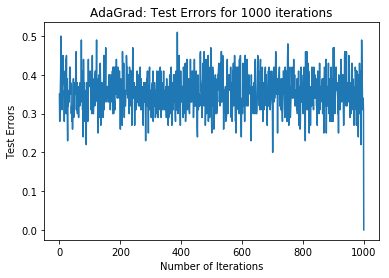

In [16]:
import matplotlib.pyplot as plt
plt.plot(test_errors_ada)
plt.title('AdaGrad: Test Errors for 1000 iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Test Errors')
plt.show()

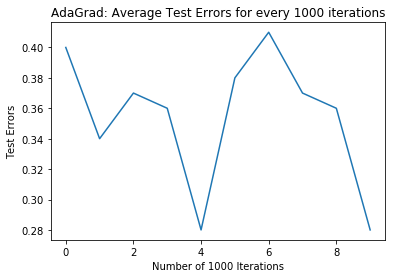

In [20]:
import matplotlib.pyplot as plt
plt.plot(test_errors_ada)
plt.title('AdaGrad: Average Test Errors for every 1000 iterations')
plt.xlabel('Number of 1000 Iterations')
plt.ylabel('Test Errors')
plt.show()

In [50]:
np.save("errors_10000_iterations_adagrad.npy", test_errors_ada)